In [ ]:
import pandas as pd
import numpy as np

link_url = "https://raw.githubusercontent.com/PhD1202/Walmart-Sales-Analytics/main/merged_data.csv"
data_date = pd.read_csv(link_url)
data_date.drop(data_date.columns[0], axis=1, inplace=True)
data_date.head()

# Assuming data_date is your DataFrame with columns "Date" and "Weekly_Sales"
# Assuming "Date" column is not in datetime format yet

# Convert "Date" column to datetime format
data_date["Date"] = pd.to_datetime(data_date["Date"])

# Set "Date" column as index
data_date.set_index("Date", inplace=True)



In [ ]:





# Import packages
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

def plot_forecasts(train, train_forecasts, test, forecasts, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Weekly_Sales'], name='Actual Sales Data'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Weekly_Sales'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts, name='Forecast'))
    # fig.add_trace(go.Scatter(x=train.index, y=train_forecasts, name='Train'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Weekly Sales')
    fig.show()


from sklearn.preprocessing import MinMaxScaler

def try_arima_model(df, p, d, q, scale = False):


    """Function to try ARIMA model."""
    # Split train and test
    train = df.iloc[:-int(len(df) * 0.2)]
    test = df.iloc[-int(len(df) * 0.2):]

    if scale:
          # Scale the data
          scaler = MinMaxScaler()
          train = scaler.fit_transform(train)
          test = scaler.transform(test)

    # Build ARIMA model
    model = ARIMA(train["Weekly_Sales"], order=(p, d, q)).fit()
    forecasts = model.forecast(len(test))
    train_forecasts = model.predict(start=train.index[0], end=train.index[-1])

    print(model.summary())

    # Plot the forecasts
    plot_forecasts(train,train_forecasts, test, forecasts, 'ARIMA')

    evaluate_arima_model(train, test, model)

from sklearn.metrics import mean_squared_error, r2_score


def evaluate_arima_model(train, test, model):
    y_pred = model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    y_true = test["Weekly_Sales"]

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    r2 = r2_score(y_true, y_pred)
    print("R^2 Score:", r2)

    # Calculate AIC
    aic = model.aic
    print("AIC:", aic)

    return rmse, r2, aic



In [ ]:
import matplotlib.pyplot as plt
def persistence_forecast(df):
    """Function to perform persistence forecasting."""
    # Split data into train and test
    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    # Extract target variable
    train_sales, test_sales = train['Weekly_Sales'], test['Weekly_Sales']

    # Create a list to store predictions
    predictions = []

    # Use the last observed value as the forecast for each test data point
    for i in range(len(test_sales)):
        predictions.append(train_sales.iloc[-1])

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_sales, predictions))
    print("Persistence Forecast RMSE:", rmse)

    r2 = r2_score(test_sales, predictions)

    print("Persistent R2", r2)

    # Plot actual vs. predicted values
    plt.plot(train.index, train_sales, label='Train')
    plt.plot(test.index, test_sales, label='Test')
    plt.plot(test.index, predictions, label='Persistence Forecast')
    plt.title('Persistence Forecasting')
    plt.xlabel('Time')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

# Example usage:
# persistence_forecast(df_weekly_sales_grouped)


Persistence Forecast RMSE: 2232.670119482141
Persistent R2 -13.525870989293058


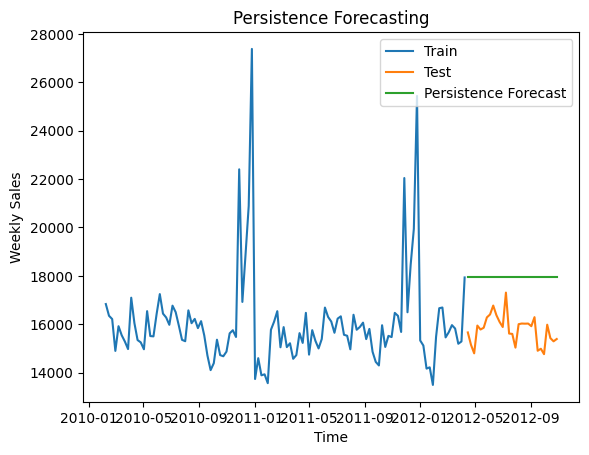

In [ ]:
df_weekly_sales_grouped = data_date["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)
persistence_forecast(df_weekly_sales_grouped)


In [ ]:
try_linear_regression(df_weekly_sales_grouped)

ValueError: at least one array or dtype is required

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

df_weekly_sales_grouped = data_date["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)


train_data_diff = df_weekly_sales_grouped.iloc[:-int(len(df_weekly_sales_grouped) * 0.2)]
test_data_diff = df_weekly_sales_grouped.iloc[-int(len(df_weekly_sales_grouped) * 0.2):]

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=500,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2073.773, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2066.980, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2064.484, Time=0.39 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2064.797, Time=0.52 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2045.558, Time=0.42 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2044.866, Time=0.95 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2063.269, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2064.572, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2066.448, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2068.536, Time=0.38 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2046.783, Time=1.08 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2063.561, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2065.554, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2065.138, Time=1.08 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2060.326, Time=2.22 sec
 ARIMA(3,0

ARIMA(maxiter=500, order=(0, 0, 5), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [ ]:

try_arima_model(df_weekly_sales_grouped, 15, 1, 15)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:               ARIMA(15, 1, 15)   Log Likelihood               -1011.962
Date:                Sun, 21 Apr 2024   AIC                           2085.924
Time:                        15:16:06   BIC                           2170.746
Sample:                    02-07-2010   HQIC                          2120.349
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7974      8.294     -0.096      0.923     -17.054      15.459
ar.L2         -0.4787      1.003     -0.477      0.633      -2.445       1.487
ar.L3         -0.8201      4.865     -0.169      0.8

RMSE: 733.7005245035413
R^2 Score: -0.5167773873259442
AIC: 2085.9241228974624


In [ ]:

try_arima_model(df_weekly_sales_grouped, 10, 2, 10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:               ARIMA(10, 2, 10)   Log Likelihood               -1025.227
Date:                Sun, 21 Apr 2024   AIC                           2092.453
Time:                        15:19:03   BIC                           2149.728
Sample:                    02-07-2010   HQIC                          2115.695
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7859      2.276     -0.785      0.433      -6.247       2.675
ar.L2         -2.0300      2.834     -0.716      0.474      -7.585       3.525
ar.L3         -2.2020      2.390     -0.921      0.3

RMSE: 1307.6928570911323
R^2 Score: -3.81832055360887
AIC: 2092.453270856635


Trying out 15, 1, 15

In [ ]:

try_arima_model(df_weekly_sales_grouped, 15, 1, 15)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:               ARIMA(15, 1, 15)   Log Likelihood               -1011.962
Date:                Sun, 21 Apr 2024   AIC                           2085.924
Time:                        14:39:42   BIC                           2170.746
Sample:                    02-07-2010   HQIC                          2120.349
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7974      8.294     -0.096      0.923     -17.054      15.459
ar.L2         -0.4787      1.003     -0.477      0.633      -2.445       1.487
ar.L3         -0.8201      4.865     -0.169      0.8

RMSE: 733.7005245035413


In [ ]:
df_weekly_sales_grouped = data_date["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)
try_arima_model(df_weekly_sales_grouped, 0, 0, 5)

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1016.425
Date:                Sun, 21 Apr 2024   AIC                           2046.851
Time:                        14:35:15   BIC                           2066.065
Sample:                    02-07-2010   HQIC                          2054.650
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.602e+04    621.882     25.766      0.000    1.48e+04    1.72e+04
ma.L1          0.4005      0.080      4.997      0.000       0.243       0.558
ma.L2          0.2786      0.106      2.631      0.0

RMSE: 670.9569973008226


In [ ]:
df_weekly_sales_grouped = data_date["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)
try_arima_model(df_weekly_sales_grouped, 0, 0, 5)

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1016.425
Date:                Sun, 21 Apr 2024   AIC                           2046.851
Time:                        15:03:02   BIC                           2066.065
Sample:                    02-07-2010   HQIC                          2054.650
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.602e+04    621.882     25.766      0.000    1.48e+04    1.72e+04
ma.L1          0.4005      0.080      4.997      0.000       0.243       0.558
ma.L2          0.2786      0.106      2.631      0.0

RMSE: 670.9569973008226
R^2 Score: -0.2684506028984006
AIC: 2046.8509149741326


Trying out 10, 1, 10

In [ ]:
df_weekly_sales_grouped = data_date["Weekly_Sales"].resample("W").mean()
df_weekly_sales_grouped = pd.DataFrame(df_weekly_sales_grouped)

try_arima_model(df_weekly_sales_grouped, 10, 1, 10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  115
Model:               ARIMA(10, 1, 10)   Log Likelihood               -1016.284
Date:                Sun, 21 Apr 2024   AIC                           2074.568
Time:                        14:35:20   BIC                           2132.028
Sample:                    02-07-2010   HQIC                          2097.888
                         - 04-15-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8301      2.664     -0.312      0.755      -6.051       4.391
ar.L2         -0.6033      1.331     -0.453      0.650      -3.212       2.006
ar.L3         -0.8709      0.941     -0.926      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RMSE: 636.2378924018427
